In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
#get result from file
df = pd.read_csv("./result_comparison.csv")
df

,model,epoch,steps,cos_sim-Accuracy@1,cos_sim-Accuracy@3,cos_sim-Accuracy@5,cos_sim-Accuracy@10,cos_sim-Precision@1,cos_sim-Recall@1,cos_sim-Precision@3,...,dot_score-Recall@1,dot_score-Precision@3,dot_score-Recall@3,dot_score-Precision@5,dot_score-Recall@5,dot_score-Precision@10,dot_score-Recall@10,dot_score-MRR@10,dot_score-NDCG@10,dot_score-MAP@100
0,KoSimCSE,-1,-1,0.456543,0.634193,0.694365,0.775549,0.456543,0.456543,0.211398,...,0.409742,0.197389,0.592168,0.132951,0.664756,0.075263,0.752627,0.517378,0.573762,0.526105
1,Epoch2,-1,-1,0.843362,0.948424,0.964661,0.978032,0.843362,0.843362,0.316141,...,0.818529,0.314550,0.943649,0.192741,0.963706,0.097899,0.978988,0.883868,0.907693,0.884566
2,mj_epoch1,-1,-1,0.788921,0.898758,0.926457,0.947469,0.788921,0.788921,0.299586,...,0.778415,0.295766,0.887297,0.184909,0.924546,0.094556,0.945559,0.838682,0.864970,0.840323
3,mj_epoch2,-1,-1,0.811843,0.911175,0.934097,0.955110,0.811843,0.811843,0.303725,...,0.805158,0.304680,0.914040,0.186246,0.931232,0.095415,0.954155,0.861569,0.884431,0.863030
4,mj_epoch3,-1,-1,0.835721,0.921681,0.939828,0.956065,0.835721,0.835721,0.307227,...,0.823305,0.308182,0.924546,0.188157,0.940783,0.095511,0.955110,0.875765,0.895473,0.876975
5,mj_epoch4,-1,-1,0.835721,0.919771,0.938873,0.956065,0.835721,0.835721,0.306590,...,0.829035,0.306272,0.918816,0.187584,0.937918,0.095702,0.957020,0.877827,0.897353,0.879007
6,mj_epoch5,-1,-1,0.831901,0.917861,0.935053,0.953200,0.831901,0.831901,0.305954,...,0.821394,0.304998,0.914995,0.186246,0.931232,0.095129,0.951289,0.872167,0.891791,0.873566
7,mj_epoch6,-1,-1,0.827125,0.915950,0.935053,0.954155,0.827125,0.827125,0.305317,...,0.822350,0.305317,0.915950,0.186628,0.933142,0.095224,0.952245,0.872668,0.892374,0.874028
8,mj_epoch7,-1,-1,0.833811,0.920726,0.935053,0.954155,0.833811,0.833811,0.306909,...,0.826170,0.307227,0.921681,0.187011,0.935053,0.095415,0.954155,0.876498,0.895756,0.877770
9,mj_epoch8,-1,-1,0.828080,0.915950,0.933142,0.953200,0.828080,0.828080,0.305317,...,0.821394,0.304680,0.914040,0.187202,0.936008,0.095415,0.954155,0.872547,0.892746,0.873845


In [53]:
df = df.iloc[:,[0,3]]
df

,model,cos_sim-Accuracy@1
0,KoSimCSE,0.456543
1,Epoch2,0.843362
2,mj_epoch1,0.788921
3,mj_epoch2,0.811843
4,mj_epoch3,0.835721
5,mj_epoch4,0.835721
6,mj_epoch5,0.831901
7,mj_epoch6,0.827125
8,mj_epoch7,0.833811
9,mj_epoch8,0.828080


In [54]:
df_accuracy = []

for i in df['cos_sim-Accuracy@1']:
    df_accuracy.append(i)
    
df_accuracy

[0.4565425023877746,
 0.8433619866284623,
 0.7889207258834766,
 0.8118433619866284,
 0.8357211079274116,
 0.8357211079274116,
 0.8319006685768864,
 0.8271251193887297,
 0.833810888252149,
 0.828080229226361,
 0.8271251193887297,
 0.836676217765043]

In [55]:
model_name  = list(df["model"])
model_name

['KoSimCSE',
 'Epoch2',
 'mj_epoch1',
 'mj_epoch2',
 'mj_epoch3',
 'mj_epoch4',
 'mj_epoch5',
 'mj_epoch6',
 'mj_epoch7',
 'mj_epoch8',
 'mj_epoch9',
 'mj_epoch10']

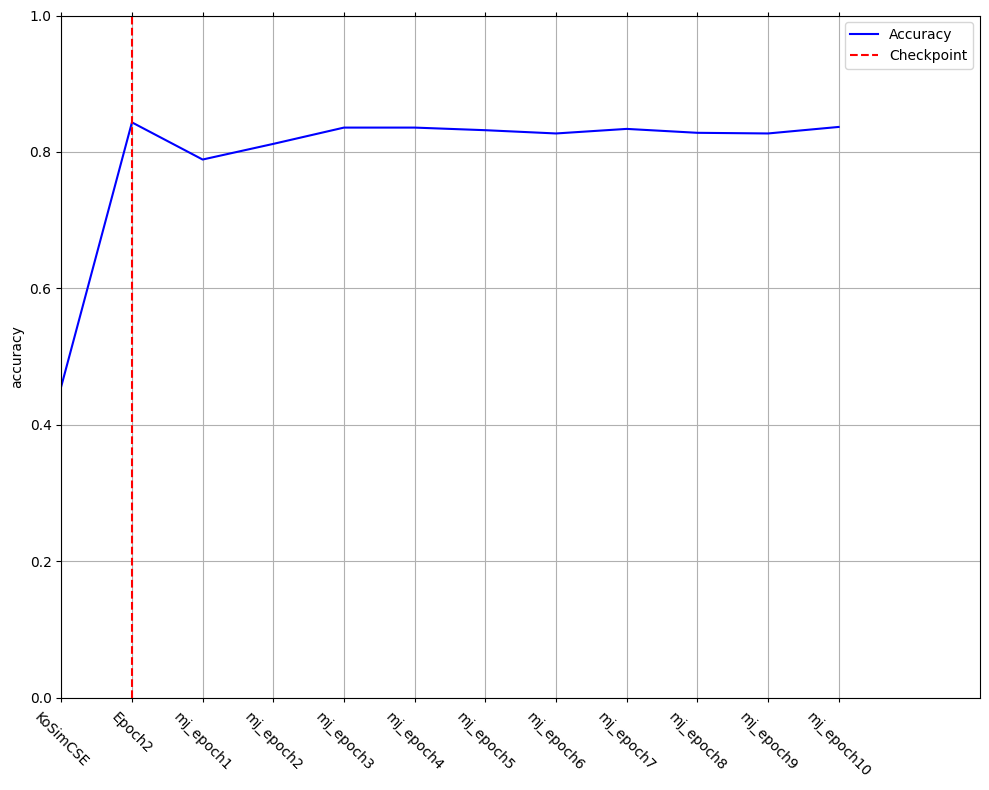

In [56]:
# visualize the accuracy as the network trained
fig = plt.figure(figsize=(10,8))
plt.plot(range(0,len(df_accuracy)),df_accuracy, label='Accuracy', color='blue') #Training accuracy
# plt.plot(range(1,len(df_accuracy)+1),df_accuracy,label='Validation accuracy')

# find position of lowest validation accuracy
maxval = df_accuracy.index(max(df_accuracy))
plt.axvline(maxval, linestyle='--', color='r',label='Checkpoint')

plt.ylabel('accuracy')
plt.ylim(0, 1) # consistent scale
plt.xlim(0, len(df_accuracy)+1) # consistent scale
plt.xticks(np.arange(0,len(df_accuracy)), model_name, rotation=-45)
plt.tick_params(axis='x', length=3, pad=6, labelsize=10, top=True)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('accuracy_plot_bf.png', bbox_inches='tight')